1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [108]:
from scipy import linalg as la

#generate 3D dataset
N = 1000

X = np.zeros((N,3))
x1= np.random.normal(0,1,1000) 
x2= np.random.normal(0,3,1000) 
x2=x1+x2
x3= 2*x1+x2 
X=np.array([x1,x2,x3])
cov=np.cov(X)

#eigvalues/vectors of cov(X)
print('cov(X): \n',cov)
l,V=la.eig(cov)
print ('\neinginevalues of cov(X): \n',l)
print ('\neinginevectors of cov(X): \n',V)

#using SVD
U, spectrum, Vt = la.svd(cov)
print('\n the eigenvalues of cov(X) via SVD is \n' , spectrum)
print ('\n the U (X=UDV^T) matrix of eigenvectors via SVD is: \n',U,'\n')

#check if the 2 corrisponds
D = np.zeros((3,3))
for i in range(3):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))

print('\n', cov, '\n\n' , SVD)
print(np.allclose(np.cov(X),SVD))

cov(X): 
 [[ 1.02057108  1.18075377  3.22189592]
 [ 1.18075377 10.28341613 12.64492367]
 [ 3.22189592 12.64492367 19.08871552]]

einginevalues of cov(X): 
 [2.84750723e+01+0.j 1.93766724e-15+0.j 1.91763045e+00+0.j]

einginevectors of cov(X): 
 [[-0.1198326  -0.81649658  0.56477737]
 [-0.57187559 -0.40824829 -0.71154173]
 [-0.81154079  0.40824829  0.41801301]]

 the eigenvalues of cov(X) via SVD is 
 [2.84750723e+01 1.91763045e+00 2.39225474e-15]

 the U (X=UDV^T) matrix of eigenvectors via SVD is: 
 [[-0.1198326   0.56477737 -0.81649658]
 [-0.57187559 -0.71154173 -0.40824829]
 [-0.81154079  0.41801301  0.40824829]] 


 [[ 1.02057108  1.18075377  3.22189592]
 [ 1.18075377 10.28341613 12.64492367]
 [ 3.22189592 12.64492367 19.08871552]] 

 [[ 1.02057108  1.18075377  3.22189592]
 [ 1.18075377 10.28341613 12.64492367]
 [ 3.22189592 12.64492367 19.08871552]]
True


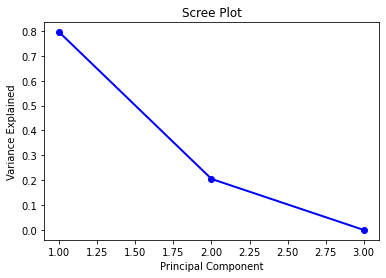


 percent of the total dataset s variability explained by the principal components x1,x1,x3 =  [7.94946815e-01 2.05053185e-01 1.40369792e-31]
we can see that the first two components explain almost 99 % of the dataset s variability


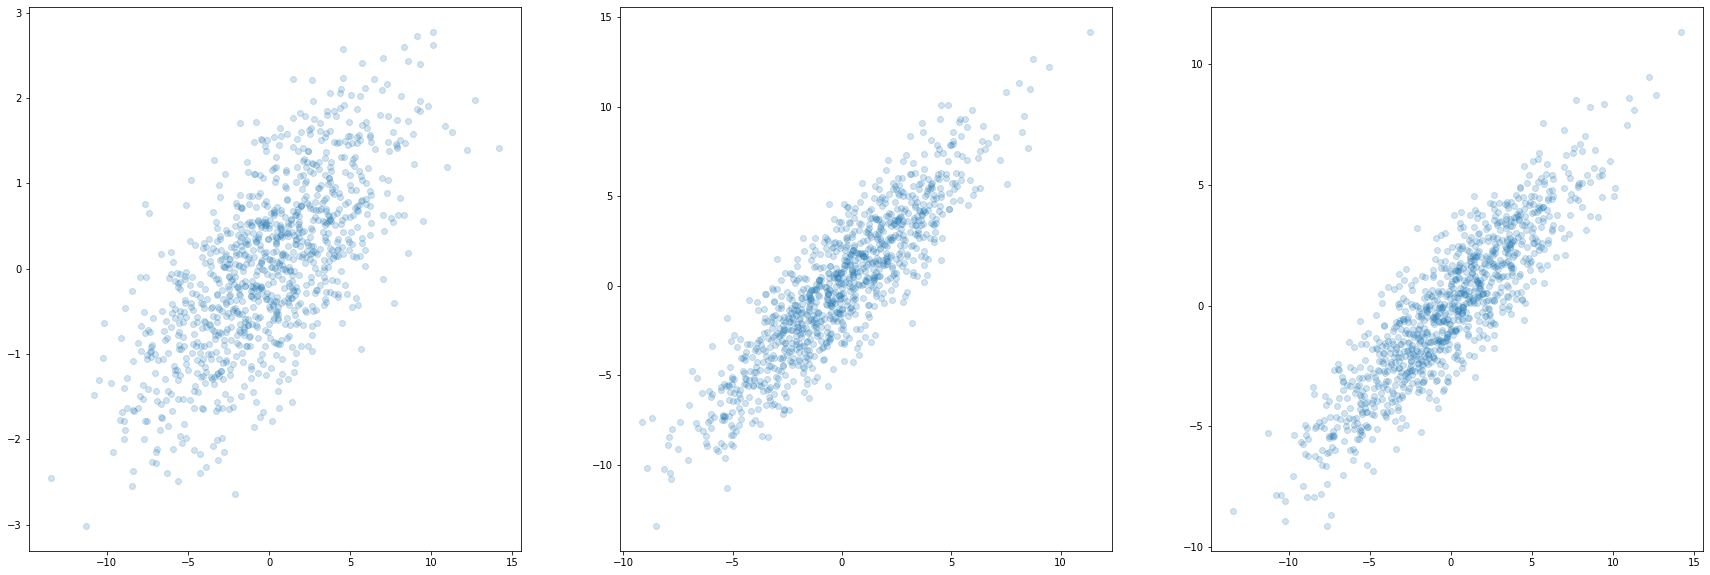

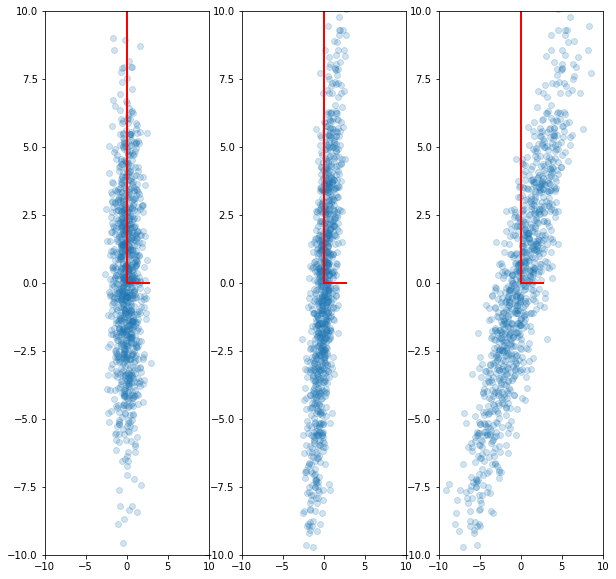

In [91]:
#NON GUARDARE QUESTO RIQUADRO


#use PCA to see what percent of the total dataset's variability is explained by the principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  #define PCA model to use
pca_fit = pca.fit(X)  #fit PCA model to data

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print('\n percent of the total dataset s variability explained by the principal components x1,x1,x3 = ', pca.explained_variance_ratio_)
print('we can see that the first two components explain almost 99 % of the dataset s variability')

#Plot the data points in the original coordinates
#the columns show the (0,1), (0,2) and (1,2) proejctions
X_reduced = np.stack((x1, x2), axis=0)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(30,10))
axes[0].scatter(X[2,:], X[0,:], alpha=0.2)
axes[1].scatter(X[1,:], X[2,:], alpha=0.2)
axes[2].scatter(X[2,:], X[1,:], alpha=0.2)
plt.show()

#plot the data points  new coordiantes as a set of scatter plots
#the columns show the (0,1), (0,2) and (1,2) proejctions
# rotate all the data points accordingly to the new base
n=1000
l0, V0 = np.linalg.eig(np.dot(X_reduced, X_reduced.T)/(n-1))
Xp = np.dot(V0.T, X_reduced)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,10))

axes[0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
axes[1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[2].scatter(X[1,:], X[2,:], alpha=0.2)

scale_factor=3
for li, vi in zip(l0, np.diag([1]*2)):
    axes[0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[0].axis([-10,10,-10,10]);
for li, vi in zip(l0, np.diag([1]*2)):
    axes[1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[1].axis([-10,10,-10,10]);
for li, vi in zip(l0, np.diag([1]*2)):
    axes[2].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[2].axis([-10,10,-10,10]);

In [109]:
#percent of the total dataset's variability explained by the PCA
l, V = np.linalg.eig(cov)
Lambda=np.diag(l)
print (Lambda)
print ("A.trace():", cov.trace())
print ("Lambda.trace():", Lambda.trace())
print ((Lambda[0,0]/Lambda.trace()).real) #92% of dataset variability explained!


#let's reduce dimensionality setting to 0 the last column
Lambda[2,2]=0
print ("Lambda.trace():", Lambda.trace())
print (Lambda[0,0]/Lambda.trace())

#Redefine the data in the basis yielded by the PCA procedure
N=1000
#l0, V0 = np.linalg.eig(np.dot(X, X.T)/(N-1))
#l0,V0= la.eigh(np.cov(X))
#Xp = np.dot(V.T, X)  # rotate all the data points accordingly to the new base

l0, V0 = np.linalg.eig(np.dot(X, X.T)/(N-1))
Xp = np.dot(V0.T, X)


[[2.84750723e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.93766724e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.91763045e+00]]
A.trace(): 30.39270272579074
Lambda.trace(): 30.39270272579075
0.9369049053949073
Lambda.trace(): 28.475072272002528
0.9999999999999999


[(-15.0, 15.0), (-10.0, 10.0)]

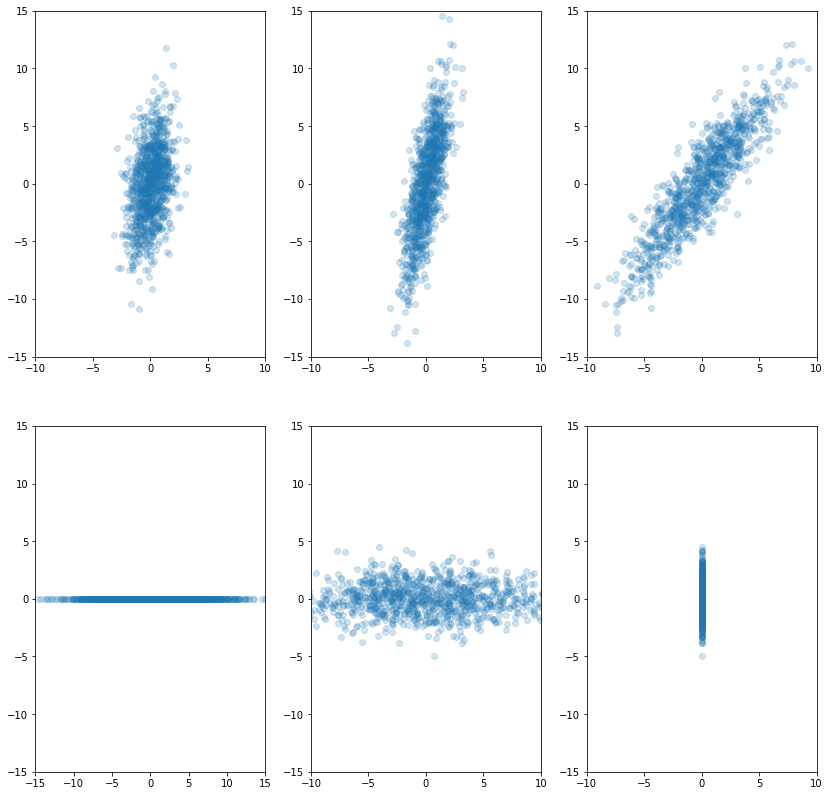

In [110]:
#Plot the data points in the original and the new coordiantes as a set of scatter plots
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3, figsize=(14,14))

#old coord
ax1.scatter(X[0,:], X[1,:], alpha=0.2)
ax1.set(xlim=(-10, 10), ylim=(-15, 15))
ax2.scatter(X[0,:], X[2,:], alpha=0.2)
ax2.set(xlim=(-10, 10), ylim=(-15, 15))
ax3.scatter(X[1,:], X[2,:], alpha=0.2)
ax3.set(xlim=(-10, 10), ylim=(-15, 15))

#new coord
ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax4.set(xlim=(-15, 15), ylim=(-15, 15))
ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax5.set(xlim=(-10, 10), ylim=(-15, 15))
ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax6.set(xlim=(-10, 10), ylim=(-15, 15))


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

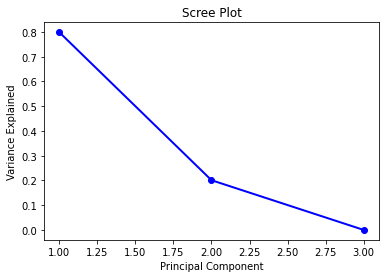


 percent of the total dataset s variability explained by the principal components x1,x1,x3 =  [7.99027040e-01 2.00972960e-01 1.08962332e-31]
we can see that the first two components explain almost 99 % of the dataset s variability


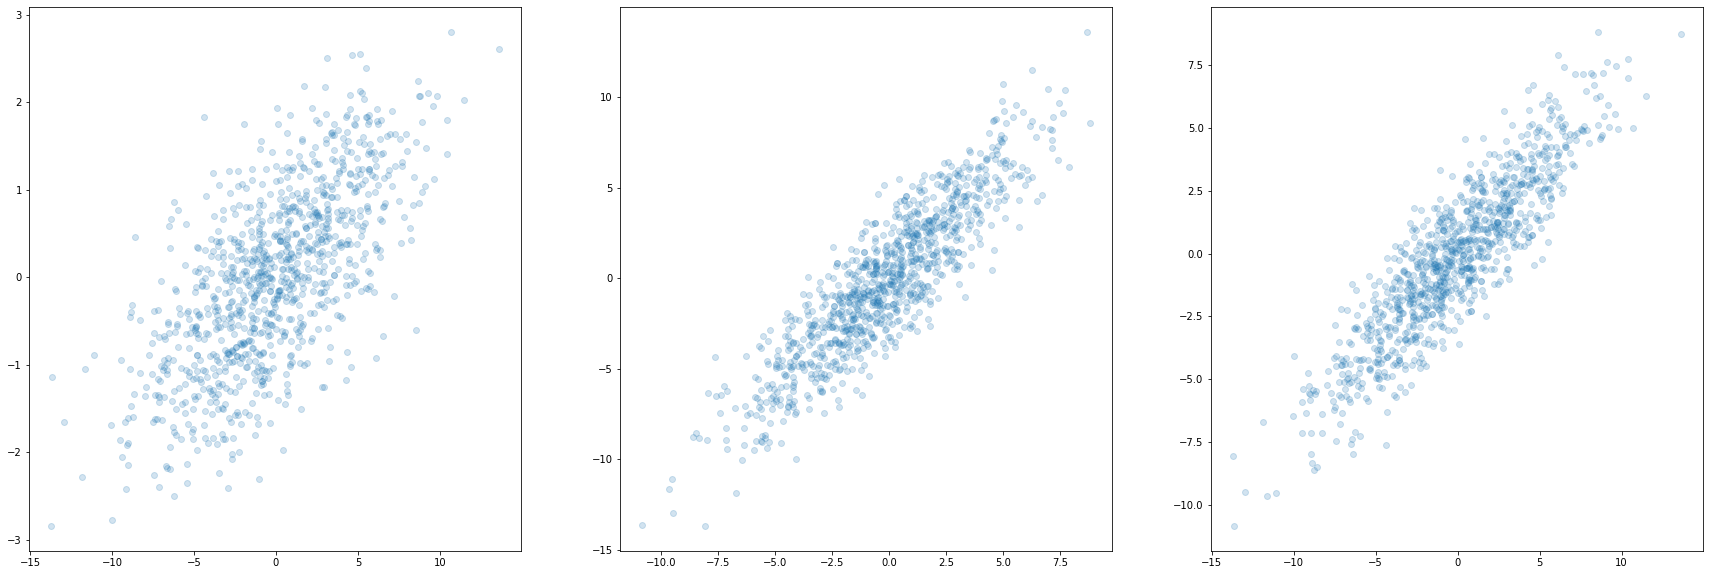

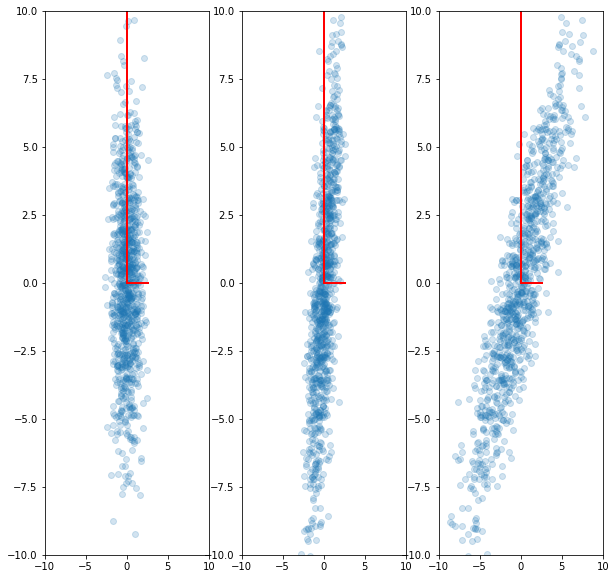

In [78]:
#dataset of previous exercise
x1= np.random.normal(0,1,1000) 
x2= np.random.normal(0,3,1000) 
x2=x1+x2
x3= 2*x1+x2 
X = np.stack((x1, x2,x3), axis=0)

#let's add some noise
#noise is represented by 10 uncorrelated variables normal distributed with variance k/50, k in (1,6)
k=1
for i in range(10):
    noise = np.random.normal(0,k/50,1000)
    X=X+noise
    k+=0.5

#use PCA to see what percent of the total dataset's variability is explained by the principal components
pca = PCA(n_components=3)  #define PCA model to use
pca_fit = pca.fit(X)  #fit PCA model to data
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print('\n percent of the total dataset s variability explained by the principal components x1,x1,x3 = ', pca.explained_variance_ratio_)
print('we can see that the first two components explain almost 99 % of the dataset s variability')


#Plot the data points in the original coordinates
#the columns show the (0,1), (0,2) and (1,2) proejctions
X_reduced = np.stack((x1, x2), axis=0)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(30,10))
axes[0].scatter(X[2,:], X[0,:], alpha=0.2)
axes[1].scatter(X[1,:], X[2,:], alpha=0.2)
axes[2].scatter(X[2,:], X[1,:], alpha=0.2)
plt.show()

#plot the data points  new coordiantes as a set of scatter plots
n=1000
l0, V0 = np.linalg.eig(np.dot(X_reduced, X_reduced.T)/(n-1))
Xp = np.dot(V0.T, X_reduced)
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,10))

axes[0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
axes[1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[2].scatter(X[1,:], X[2,:], alpha=0.2)

for li, vi in zip(l0, np.diag([1]*2)):
    axes[0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[0].axis([-10,10,-10,10]);
for li, vi in zip(l0, np.diag([1]*2)):
    axes[1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[1].axis([-10,10,-10,10]);
for li, vi in zip(l0, np.diag([1]*2)):
    axes[2].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
axes[2].axis([-10,10,-10,10]);

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


[Text(0.5, 1.0, 'Noise')]

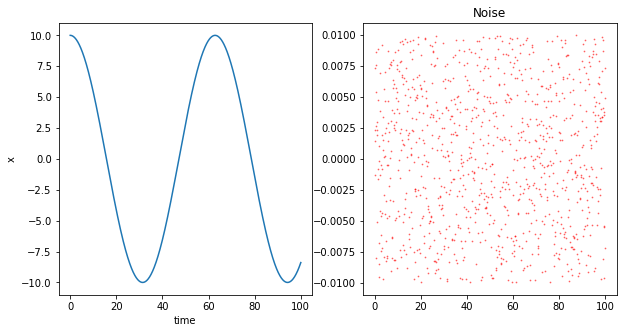

In [93]:
#simulation of the records of the spring's motion along x axis
#assuming a little random noise along the 𝑦

N=1000
omega=0.1
A=10

time=np.linspace(0,100,N)
x=A*np.cos(time*omega)
y=np.random.uniform(-0.01,0.01,N)

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
ax1.plot(time,x)
ax1.set(xlabel='time')
ax1.set(ylabel='x')

ax2.plot(time,y, 'ro', alpha=0.5, markersize=0.8)
ax2.set(title='Noise')

In [95]:
# Rotate such dataset to emulate the records of each camera

x_new=np.array([x]*8) #create a copy of x (for ex I use 8 cameras)
y_new=np.array([y,]*8) #create copy of y (noise)

#now we rotate the copies
sin_th=[np.sin(np.pi*i/4) for i in range(0,8)]
cos_th=[np.cos(np.pi*i/4) for i in range(0,8)]
sin_phi=[np.sin(np.pi*i/8) for i in range(0,8)]

for i in range(0,8):
    x_new[i,:]=x_new[i,:]*sin_phi[i]*cos_th[i]  #8 row, one for each camera, 1000 columns
    y_new[i,:]=y_new[i,:]*sin_phi[i]*sin_th[i]


(16, 16)


[(0.0, 100.0)]

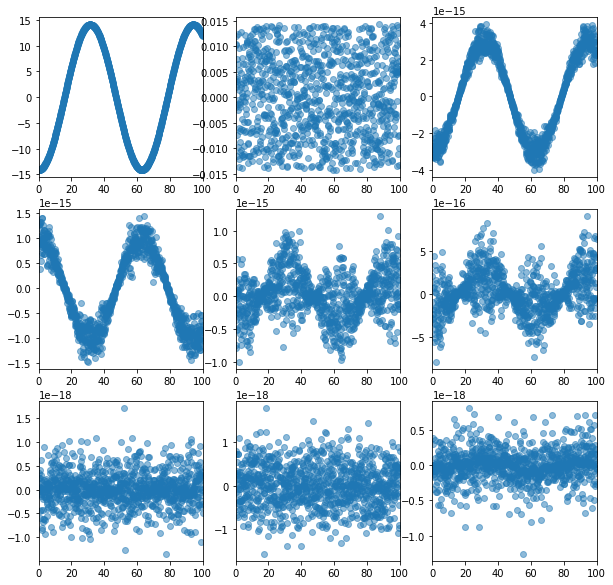

In [104]:
#Perform a Principal Component Analysis on the thus obtained dataset
matrix=x_new
matrix=np.append(matrix,y_new,axis=0)

cov=np.cov(matrix)
print(cov.shape)

U, D, Vt = la.svd(cov)
matrixp = np.dot(Vt, matrix)

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9))=plt.subplots(3,3, figsize=(10,10))
ax1.scatter(time,matrixp[0,:],alpha=0.5)
ax1.set(xlim=(0,100))

ax2.scatter(time,matrixp[1,:],alpha=0.5)
ax2.set(xlim=(0,100))

ax3.scatter(time,matrixp[2,:],alpha=0.5)
ax3.set(xlim=(0,100))

ax4.scatter(time,matrixp[3,:],alpha=0.5)
ax4.set(xlim=(0,100))

ax5.scatter(time,matrixp[4,:],alpha=0.5)
ax5.set(xlim=(0,100))

ax6.scatter(time,matrixp[5,:],alpha=0.5)
ax6.set(xlim=(0,100))

ax7.scatter(time,matrixp[6,:],alpha=0.5)
ax7.set(xlim=(0,100))

ax8.scatter(time,matrixp[7,:],alpha=0.5)
ax8.set(xlim=(0,100))

ax9.scatter(time,matrixp[8,:],alpha=0.5)
ax9.set(xlim=(0,100))

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 